In [2]:
import torch
import matplotlib.pyplot as plt
import hydra
from hydra.core.global_hydra import GlobalHydra
from omegaconf import DictConfig, OmegaConf
!cd /home/tmarwah/projects/3DMamba/
!pwd
import os
os.chdir('/home/tmarwah/projects/3DMamba/')

/home/tmarwah/projects/3DMamba/notebooks


In [3]:
# This is a workaround for reinitializing Hydra in a Jupyter notebook.
GlobalHydra.instance().clear()

def get_dataset(config_path="../configs/dataset", dataset_name="nuscenes_lidar_v1.0", **kwargs):
    # Initialize Hydra once per notebook session.
    if not GlobalHydra.instance().is_initialized():
        hydra.initialize(config_path=config_path, version_base=None)
    
    cfg = hydra.compose(config_name=dataset_name)
    # print(OmegaConf.to_yaml(cfg))
    # instantiate the dataset
    dataset = hydra.utils.instantiate(cfg.params, **kwargs)
    return dataset

In [12]:
dataset = get_dataset(if_test=True)

Loading NuScenes tables for version v1.0-trainval...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
34149 lidarseg,
Done loading in 26.115 seconds.
Reverse indexing ...
Done reverse indexing in 6.3 seconds.


In [13]:
from collections import Counter
c = Counter()
for x,y in dataset:
    c.update(y.flatten().tolist())

<BarContainer object of 20 artists>

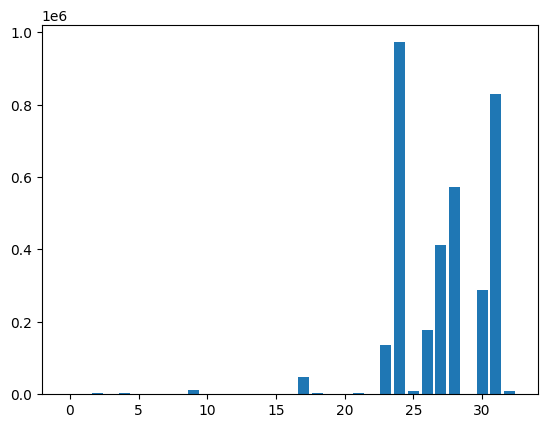

In [14]:
# plot histogram
plt.bar(c.keys(), c.values())

In [15]:
c

Counter({24: 972083,
         27: 412158,
         4: 2389,
         28: 572244,
         31: 829716,
         26: 177986,
         30: 288338,
         23: 135580,
         2: 2365,
         17: 46497,
         0: 1382,
         25: 9736,
         12: 528,
         32: 9600,
         11: 1813,
         18: 3954,
         9: 12502,
         10: 307,
         21: 2179,
         14: 243})

In [16]:
sum(c.values())

3481600